In [25]:
import os, re
curPath = os.getcwd()
match = re.search(pattern=r"^.+?WQD7003_DataAnalytics", string=curPath, flags=re.IGNORECASE)
rootPath = match.group()
os.chdir(rootPath)
os.getcwd()

'd:\\Administration\\Universities\\UniMalaya\\MCS-AC\\WQD7003_DataAnalytics'

In [26]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

from imblearn.ensemble import BalancedBaggingClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
DataFilePath_1 = "./data/Heart_2022_Encoded_1.csv"
target_classes = ['HadHeartAttack_No','HadHeartAttack_Yes']

In [28]:
df = pd.read_csv(DataFilePath_1)

In [29]:
X = df.drop(columns=['oe_3_2__HadHeartAttack'])
y = df['oe_3_2__HadHeartAttack']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=20231231)

# Decision Tree with Criterion GINI

In [31]:
dt_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=20231231)
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=20231231)

In [32]:
y_train_predict = dt_gini.predict(X_train)
y_test_predict = dt_gini.predict(X_test)

In [33]:
print("Training Dataset")
print("_"*60)
print(classification_report(y_train,y_train_predict,target_names=target_classes))
print("_"*60)
print("Training set accuracy: {:.4f}".format(dt_gini.score(X_train,y_train)))
print("_"*60)
print("#"*60)
print("Testing Dataset")
print("_"*60)
print(classification_report(y_test,y_test_predict,target_names=target_classes))
print("_"*60)
print("Testing set accuracy: {:.4f}".format(dt_gini.score(X_test,y_test)))
print("_"*60)
print("#"*60)

Training Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.95      1.00      0.97    218489
HadHeartAttack_Yes       0.59      0.11      0.18     12275

          accuracy                           0.95    230764
         macro avg       0.77      0.55      0.58    230764
      weighted avg       0.93      0.95      0.93    230764

____________________________________________________________
Training set accuracy: 0.9485
____________________________________________________________
############################################################
Testing Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.95      1.00      0.97     93609
HadHeartAttack_Yes       0.61      0.11      0.19      5290

          accuracy                           0.95     98899
         macro avg       0.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.829


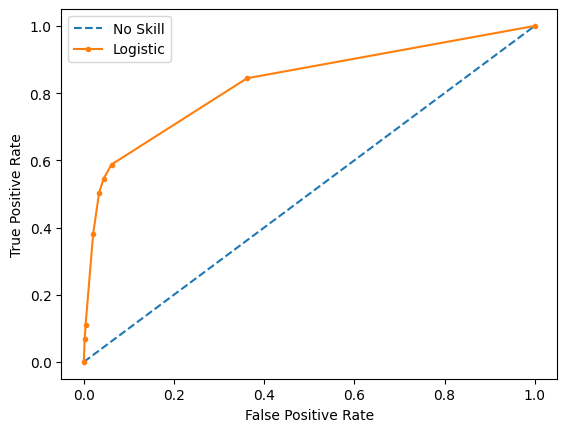

In [34]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = dt_gini.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

<Axes: >

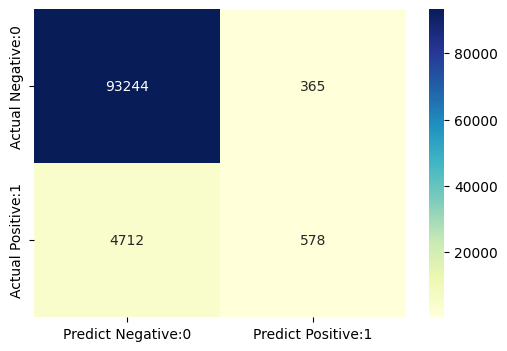

In [35]:
cm = confusion_matrix(y_test,y_test_predict)
# cm
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm,columns=['Predict Negative:0', 'Predict Positive:1'],
                                index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Decision Tree with Criterion Entropy

In [36]:
dt_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=20231231)
dt_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=20231231)

In [37]:
y_train_predict = dt_entropy.predict(X_train)
y_test_predict = dt_entropy.predict(X_test)

In [38]:
print("Training Dataset")
print("_"*60)
print(classification_report(y_train,y_train_predict,target_names=target_classes))
print("_"*60)
print("Training set accuracy: {:.4f}".format(dt_entropy.score(X_train,y_train)))
print("_"*60)
print("#"*60)
print("Testing Dataset")
print("_"*60)
print(classification_report(y_test,y_test_predict,target_names=target_classes))
print("_"*60)
print("Testing set accuracy: {:.4f}".format(dt_entropy.score(X_test,y_test)))
print("_"*60)
print("#"*60)

Training Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.95      1.00      0.97    218489
HadHeartAttack_Yes       0.59      0.11      0.18     12275

          accuracy                           0.95    230764
         macro avg       0.77      0.55      0.58    230764
      weighted avg       0.93      0.95      0.93    230764

____________________________________________________________
Training set accuracy: 0.9485
____________________________________________________________
############################################################
Testing Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.95      1.00      0.97     93609
HadHeartAttack_Yes       0.61      0.11      0.19      5290

          accuracy                           0.95     98899
         macro avg       0.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.843


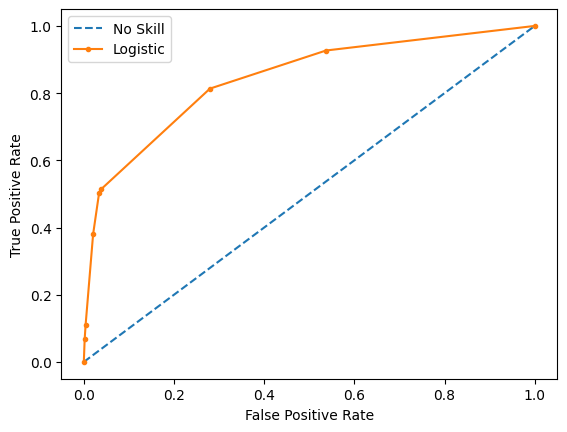

In [39]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = dt_entropy.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

<Axes: >

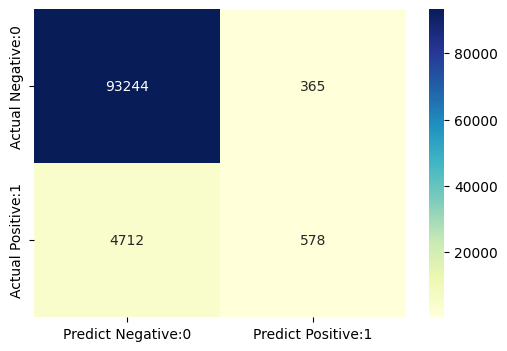

In [40]:
cm = confusion_matrix(y_test,y_test_predict)
# cm
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm,columns=['Predict Negative:0', 'Predict Positive:1'],
                                index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Balanced Bagging

In [41]:
bbc_gini = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=20231231),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=20231231)
bbc_entropy = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=20231231),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=20231231)

In [42]:
bbc_gini.fit(X_train,y_train)
bbc_entropy.fit(X_train,y_train)

BalancedBaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                           max_depth=3,
                                                           random_state=20231231),
                          random_state=20231231)

In [43]:
y_train_predict = bbc_gini.predict(X_train)
y_test_predict = bbc_gini.predict(X_test)

In [44]:
print("Training Dataset")
print("_"*60)
print(classification_report(y_train,y_train_predict,target_names=target_classes))
print("_"*60)
print("Training set accuracy: {:.4f}".format(bbc_gini.score(X_train,y_train)))
print("_"*60)
print("#"*60)
print("Testing Dataset")
print("_"*60)
print(classification_report(y_test,y_test_predict,target_names=target_classes))
print("_"*60)
print("Testing set accuracy: {:.4f}".format(bbc_gini.score(X_test,y_test)))
print("_"*60)
print("#"*60)

Training Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.99      0.72      0.83    218489
HadHeartAttack_Yes       0.14      0.82      0.24     12275

          accuracy                           0.72    230764
         macro avg       0.56      0.77      0.54    230764
      weighted avg       0.94      0.72      0.80    230764

____________________________________________________________
Training set accuracy: 0.7242
____________________________________________________________
############################################################
Testing Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.99      0.72      0.83     93609
HadHeartAttack_Yes       0.14      0.81      0.24      5290

          accuracy                           0.73     98899
         macro avg       0.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.852


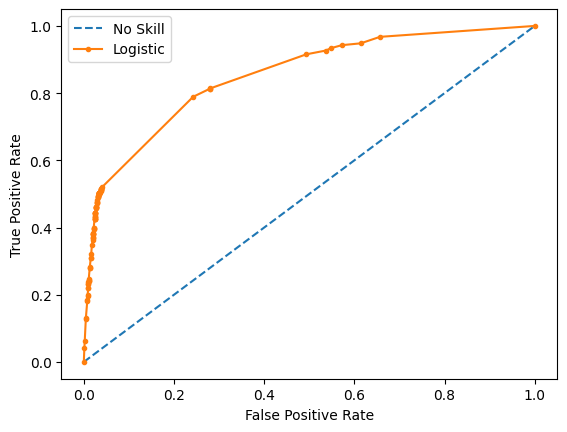

In [49]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = bbc_gini.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [50]:
y_train_predict = bbc_entropy.predict(X_train)
y_test_predict = bbc_entropy.predict(X_test)

In [51]:
print("Training Dataset")
print("_"*60)
print(classification_report(y_train,y_train_predict,target_names=target_classes))
print("_"*60)
print("Training set accuracy: {:.4f}".format(bbc_entropy.score(X_train,y_train)))
print("_"*60)
print("#"*60)
print("Testing Dataset")
print("_"*60)
print(classification_report(y_test,y_test_predict,target_names=target_classes))
print("_"*60)
print("Testing set accuracy: {:.4f}".format(bbc_entropy.score(X_test,y_test)))
print("_"*60)
print("#"*60)

Training Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.99      0.72      0.83    218489
HadHeartAttack_Yes       0.14      0.82      0.24     12275

          accuracy                           0.72    230764
         macro avg       0.56      0.77      0.54    230764
      weighted avg       0.94      0.72      0.80    230764

____________________________________________________________
Training set accuracy: 0.7246
____________________________________________________________
############################################################
Testing Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.99      0.72      0.83     93609
HadHeartAttack_Yes       0.14      0.81      0.24      5290

          accuracy                           0.73     98899
         macro avg       0.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.848


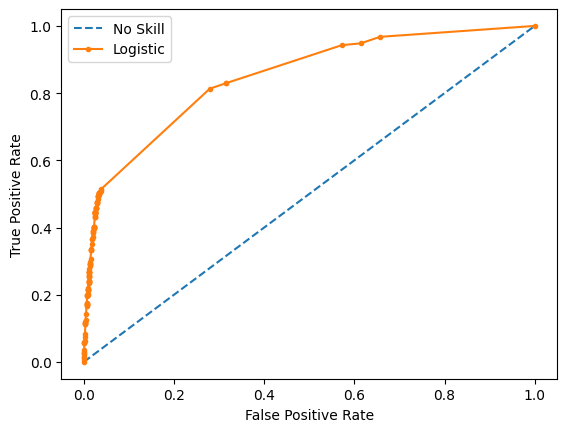

In [52]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = bbc_entropy.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()